In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
df = pd.read_csv("economic_index.csv")

In [44]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [45]:
# To drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [46]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [47]:
# To check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

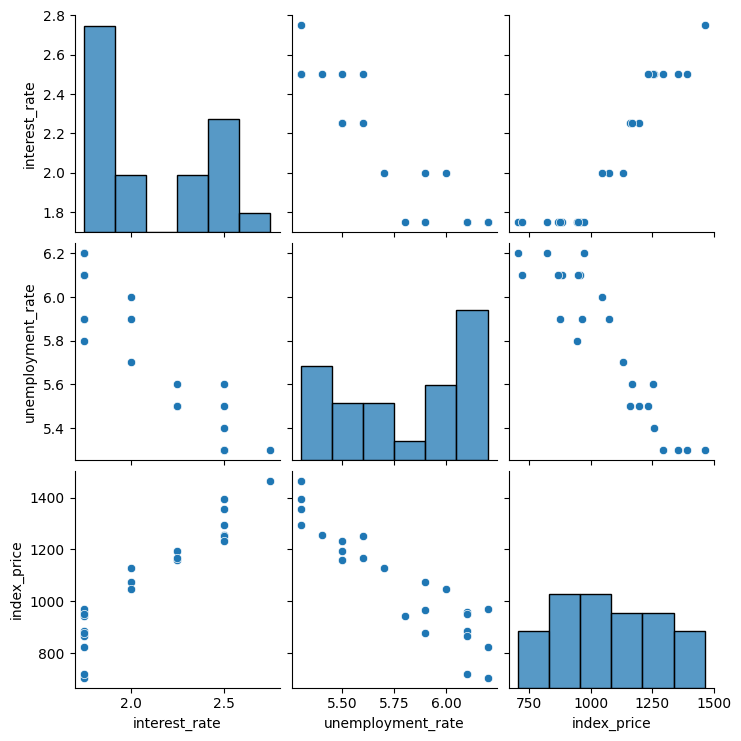

In [48]:
# To visualize
import seaborn as sns
sns.pairplot(df)

In [49]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

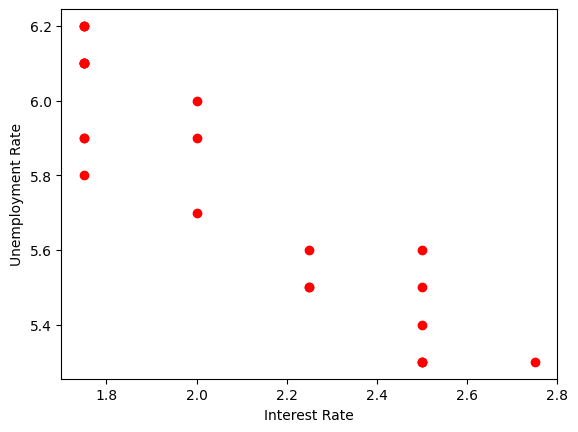

In [50]:
# To visualize the data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [51]:
# To separate the independent and dependent features
# X = df[['interest_rate'. 'unemployment_rate']] # another way of doing this
X = df.iloc[:, :-1] # Pick all rows and column, except the last column
y = df.iloc[:, -1] # Pick all rows and the last column only

In [52]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [53]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [54]:
# To do train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
# sns.regplot(df['interest_rate'], df['index_price'])

In [56]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [61]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [62]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [63]:
regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# To perform cross validation on the model
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(
    regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [67]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [68]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [69]:
# To make prediction
y_pred = regression.predict(X_test)

In [71]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [73]:
# To implement performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306607
73.80444932337097
90.04758423359623


In [78]:
# To check the R-Square & Adjusted R-Square
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R-Square Score: ", score)

adjusted_score = 1 - (1-score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)
print("Adjusted R-Square Score: ", adjusted_score)

R-Square Score:  0.7591371539010257
Adjusted R-Square Score:  0.5985619231683761


## Assumptions

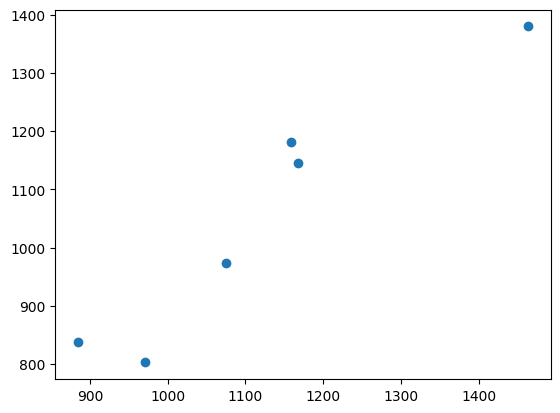

In [79]:
plt.scatter(y_test, y_pred)

In [81]:
# To check the residuals - the errors between y_test and y_pred
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


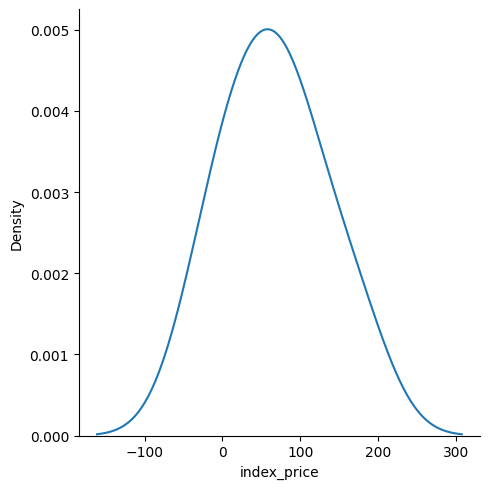

In [82]:
# To plot the residuals
sns.displot(residuals, kind='kde')

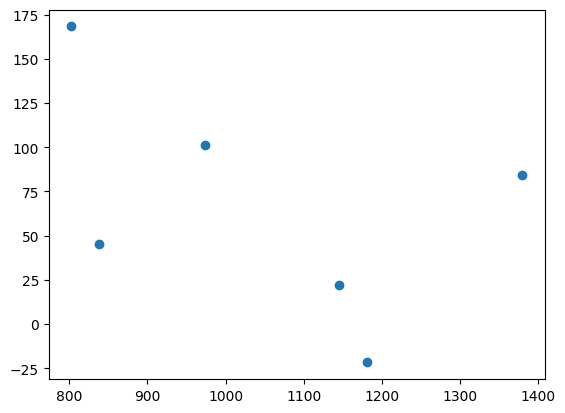

In [83]:
# To create a scatter plot with respect to predictions and residuals
plt.scatter(y_pred, residuals)

In [84]:
# To perform OLS
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [85]:
model.summary()

/Users/greatdaveo/CODE_BASE/ML-Course/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 24 Jun 2025   Prob (F-statistic):                       0.754
Time:                        05:13:09   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
print(regression.coef_)

[  88.27275507 -116.25716066]
